In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

In [21]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
df=df.dropna(axis=1)

In [23]:
x=df.iloc[:,2:4]
y=df.iloc[:,-1]
x,y

(     Age  EstimatedSalary
 0     19            19000
 1     35            20000
 2     26            43000
 3     27            57000
 4     19            76000
 ..   ...              ...
 395   46            41000
 396   51            23000
 397   50            20000
 398   36            33000
 399   49            36000
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [24]:
x.isna().sum()
y.isna().sum()

0

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3.0,random_state=0)

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
rfc=RandomForestClassifier(n_estimators=3,criterion='entropy',random_state=0)

In [29]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=3, random_state=0)

In [30]:
y_pred=rfc.predict(x_test)

In [31]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1])

In [32]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred)*100)

89.55223880597015


<ipython-input-33-790e789e2f42>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],


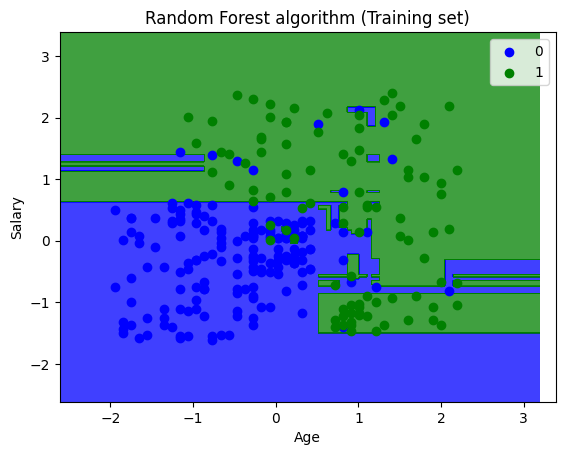

In [33]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set , Y_set = x_train ,y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1 , step = 0.01),
                     np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1 , step = 0.01))
plt.contourf(X1 , X2, rfc.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap =ListedColormap(('blue','green')))
plt.xlim(X1.min(),X1.max())
plt.xlim(X2.min(),X2.max())

for i, j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],
              c = ListedColormap(('blue','green'))(i),label =j)
plt.title('Random Forest algorithm (Training set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()


<ipython-input-35-e215882131f1>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],


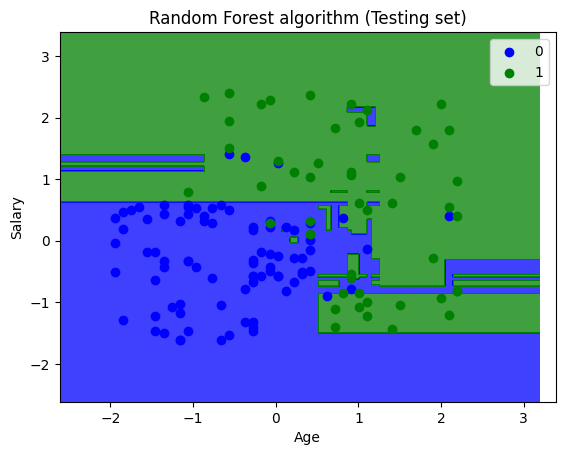

<ipython-input-36-e215882131f1>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],


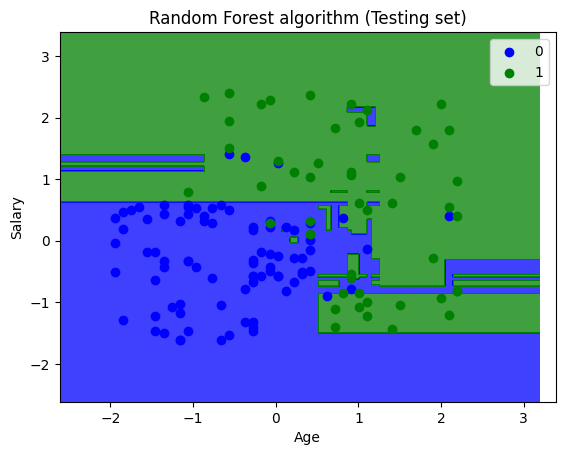

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set , Y_set = x_test ,y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1 , step = 0.01),
                     np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1 , step = 0.01))
plt.contourf(X1 , X2, rfc.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap =ListedColormap(('blue','green')))
plt.xlim(X1.min(),X1.max())
plt.xlim(X2.min(),X2.max())

for i, j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],
              c = ListedColormap(('blue','green'))(i),label =j)
plt.title('Random Forest algorithm (Testing set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=5,criterion='gini',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [39]:
y_pred=classifier.predict(x_test)

In [42]:

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

from sklearn.metrics import accuracy_score
prediction = accuracy_score(y_test,y_pred)
print("Accuracy:",prediction*100,"%")


Accuracy: 89.55223880597015 %


In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='gini',random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
prediction = accuracy_score(y_test,y_pred)
print("Accuracy:",prediction*100,"%")

Accuracy: 88.80597014925374 %


In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=15,criterion='gini',random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
prediction = accuracy_score(y_test,y_pred)
print("Accuracy:",prediction*100,"%")

Accuracy: 89.55223880597015 %


In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=20,criterion='gini',random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
prediction = accuracy_score(y_test,y_pred)
print("Accuracy:",prediction*100,"%")

Accuracy: 91.04477611940298 %


In [47]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=25,criterion='gini',random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
prediction = accuracy_score(y_test,y_pred)
print("Accuracy:",prediction*100,"%")

Accuracy: 91.04477611940298 %
